In [33]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [34]:
# Load Data Viz Pkgs
#visualization library 
import seaborn as sns

In [35]:
# Load Text Cleaning Pkgs
# cleaning and processing natural language text data
import neattext.functions as nfx
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

warnings.filterwarnings("ignore")

In [36]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC

# Transformers
# converts a collection of text documents into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
# Load Dataset
df = pd.read_csv("../data/test.csv")

In [38]:
df.head()

,label,review
0,positive,One of the best game music soundtracks - for a...
1,negative,Batteries died within a year ...
2,positive,"works fine, but Maha Energy is better"
3,positive,Great for the non-audiophile
4,negative,DVD Player crapped out after one year


In [39]:
# Value Counts
df['label'].value_counts()

negative    200000
positive    199999
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

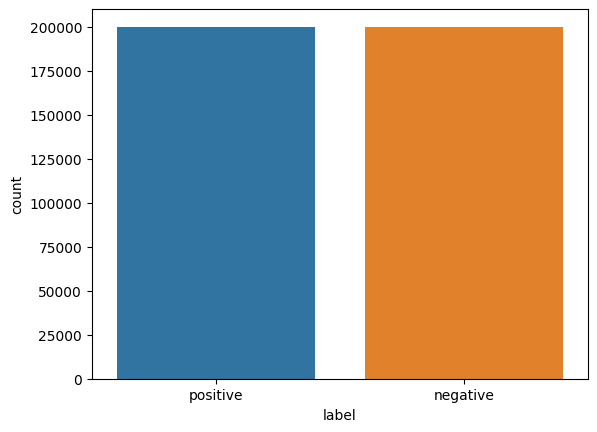

In [40]:
# Plot
sns.countplot(x='label',data=df)

In [41]:
# Data Cleaning
# neattext.functions list of all the function
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [42]:
# User handles
# df['Clean_Review'] = df['review'].apply(nfx.remove_userhandles)

# import nfx
# Check for null and non-string values
mask = (~df['review'].isnull()) & (df['review'].dtype == object)

# Apply remove_userhandles only to the valid string values
df.loc[mask, 'Clean_Review'] = df.loc[mask, 'review'].apply(nfx.remove_userhandles)

In [43]:
# Stopwords
# df['Clean_Review'] = df['Clean_Review'].apply(nfx.remove_stopwords)

mask = (~df['Clean_Review'].isnull()) & (df['Clean_Review'].apply(lambda x: isinstance(x, str)))

# Apply remove_stopwords only to the valid string values
df.loc[mask, 'Clean_Review'] = df.loc[mask, 'Clean_Review'].apply(nfx.remove_stopwords)

In [44]:
df

,label,review,Clean_Review
0,positive,One of the best game music soundtracks - for a...,best game music soundtracks - game play
1,negative,Batteries died within a year ...,Batteries died year ...
2,positive,"works fine, but Maha Energy is better","works fine, Maha Energy better"
3,positive,Great for the non-audiophile,Great non-audiophile
4,negative,DVD Player crapped out after one year,DVD Player crapped year
...,...,...,...
399994,negative,Unbelievable- In a Bad Way,Unbelievable- Bad Way
399995,negative,"Almost Great, Until it Broke...","Great, Broke..."
399996,negative,Disappointed !!!,Disappointed !!!
399997,positive,Classic Jessica Mitford,Classic Jessica Mitford


In [45]:
# Features & Labels
Xfeatures = df['Clean_Review']
ylabels = df['label']

In [46]:
#  Split Data
# pseudo-random number generator to randomly shuffle the data and then partition
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [47]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [48]:
# LogisticRegression Pipeline
# CountVectorizer: This is a feature extraction step that converts text data into 
# a numerical representation that can be used for machine learning.
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])


# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer

pipe_nb = Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [49]:
# Train and Fit Data
# pipe_lr.fit(x_train,y_train)
# import pandas as pd

# Check for missing values in x_train and y_train
null_rows = pd.isnull(x_train)
if np.any(null_rows):
    print(f"Found {np.sum(null_rows)} null rows in x_train, removing them...")
    x_train = x_train[~null_rows]
    y_train = y_train[~null_rows]

# Fit the model with the updated input data
pipe_lr.fit(x_train, y_train)
pipe_nb.fit(x_train ,y_train)

Found 10 null rows in x_train, removing them...


Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [50]:
pipe_lr
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [51]:
# Check Accuracy
# pipe_lr.score(x_test,y_test)

null_rows = pd.isnull(x_test)
if np.any(null_rows):
    print(f"Found {np.sum(null_rows)} null rows in x_test, removing them...")
    x_test = x_test[~null_rows]
    y_test = y_test[~null_rows]

# Calculate the score with the updated input data
score = pipe_lr.score(x_test, y_test)
score1 = pipe_nb.score(x_test, y_test)
print(score)
print(score1)

Found 5 null rows in x_test, removing them...
0.7980415850660444
0.7937914079753323


In [52]:
# Make A Prediction
ex1 = "bad product to buy"

In [53]:
pipe_lr.predict([ex1])

array(['negative'], dtype=object)

In [54]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.9335322, 0.0664678]])

In [55]:
# To Know the classes
pipe_lr.classes_

array(['negative', 'positive'], dtype=object)

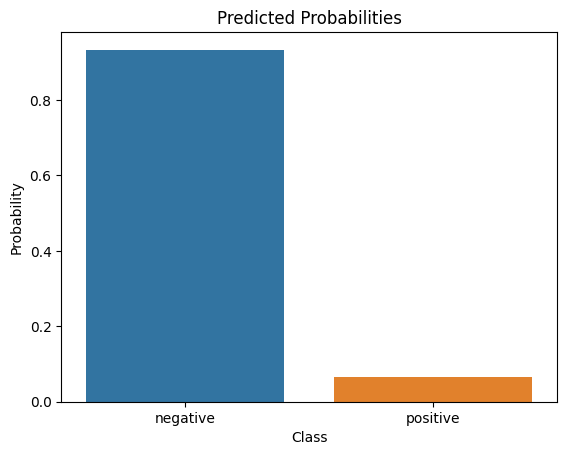

In [56]:
import matplotlib.pyplot as plt


# Get the predicted probabilities
probabilities = pipe_lr.predict_proba([ex1])[0]

# Get the class labels
class_labels = pipe_lr.classes_

# Create a bar plot
sns.barplot(x=class_labels, y=probabilities)

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted Probabilities')

# Show the plot
plt.show()


In [57]:
# Save Model & Pipeline
import joblib
pipeline_file = open("../models/amazon_review_final.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()